In [263]:
import os
import sklearn
import pandas as pd
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from google.colab import drive
import seaborn as sns
import tensorflow as tf
from keras.models import save_model
from tensorflow import keras
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import pickle
from keras.layers import Input, Dense, concatenate
from sklearn.metrics import accuracy_score
from keras.models import Model
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.layers import Dropout
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**DATA PREPROCESSING**

In [264]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/intro_to_AI/CustomerChurn_dataset.csv')

In [265]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [266]:
#checking for missing values among the columns with numeric values
numeric_columns = df.select_dtypes(include=['float64','int64'])
missing_values = numeric_columns.isnull().sum()
missing_values

SeniorCitizen     0
tenure            0
MonthlyCharges    0
dtype: int64

In [267]:
#checking for missing values among the columns with categorical values
objects_columns = df.select_dtypes(include=['object'])
objects_columns

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [268]:
objects_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   Partner           7043 non-null   object
 3   Dependents        7043 non-null   object
 4   PhoneService      7043 non-null   object
 5   MultipleLines     7043 non-null   object
 6   InternetService   7043 non-null   object
 7   OnlineSecurity    7043 non-null   object
 8   OnlineBackup      7043 non-null   object
 9   DeviceProtection  7043 non-null   object
 10  TechSupport       7043 non-null   object
 11  StreamingTV       7043 non-null   object
 12  StreamingMovies   7043 non-null   object
 13  Contract          7043 non-null   object
 14  PaperlessBilling  7043 non-null   object
 15  PaymentMethod     7043 non-null   object
 16  TotalCharges      7043 non-null   object
 17  Churn         

In [269]:
##SINCE THERE ARE NO NULL VALUES TO HANDLE, WE PROCEED TO ENCODING OF CATEGORICAL VALUES & IMPUTING

In [270]:
# Convert the 'TotalCharges' column to a numeric data type and handle invalid values by replacing them with 0
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [271]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [273]:
# To determine which encoding methods was suitable for which columns
for column_name in df.columns:
    unique_values = df[column_name].unique()
    print(f'Unique values in column "{column_name}": {unique_values}')


Unique values in column "customerID": ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in column "gender": ['Female' 'Male']
Unique values in column "SeniorCitizen": [0 1]
Unique values in column "Partner": ['Yes' 'No']
Unique values in column "Dependents": ['No' 'Yes']
Unique values in column "tenure": [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values in column "PhoneService": ['No' 'Yes']
Unique values in column "MultipleLines": ['No phone service' 'No' 'Yes']
Unique values in column "InternetService": ['DSL' 'Fiber optic' 'No']
Unique values in column "OnlineSecurity": ['No' 'Yes' 'No internet service']
Unique values in column "OnlineBackup": ['Yes' 'No' 'No internet service']
Unique values in column "DeviceProtection": ['No' 'Yes' 'No internet serv

In [274]:
# Label encoding is used for the following columns due to its ordinal nature, reflecting the clear order of categories.
categorical_cols_unique = ['gender', 'Partner', 'Dependents', 'PhoneService',  'Contract', 'PaperlessBilling', 'Churn']
label_encoder = LabelEncoder()

# Iterate through the columns and apply label encoding
for column in categorical_cols_unique:
    df[column] = label_encoder.fit_transform(df[column])

In [275]:
pickle_out = open("label_encoder.pkl", "wb")
pickle.dump(label_encoder, pickle_out)
pickle_out.close()

In [276]:
# One-hot encoding is employed for the following columns to prevent any implied order, as it is nominal data.
categorical_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV','StreamingMovies', 'PaymentMethod']

df = pd.get_dummies(df, columns=categorical_cols)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,1,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,1,0,56.95,...,1,0,0,1,0,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,0,1,53.85,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,42.30,...,1,0,0,1,0,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,1,70.70,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,1,84.80,...,0,0,1,0,0,1,0,0,0,1
7039,2234-XADUH,0,0,1,1,72,1,1,1,103.20,...,0,0,1,0,0,1,0,1,0,0
7040,4801-JZAZL,0,0,1,1,11,0,0,1,29.60,...,1,0,0,1,0,0,0,0,1,0
7041,8361-LTMKD,1,1,1,0,4,1,0,1,74.40,...,1,0,0,1,0,0,0,0,0,1


In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   int64  
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int64  
 4   Dependents                               7043 non-null   int64  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int64  
 7   Contract                                 7043 non-null   int64  
 8   PaperlessBilling                         7043 non-null   int64  
 9   MonthlyCharges                           7043 non-null   float64
 10  TotalCharges                             7043 no

In [278]:
##SCALING OF NUMERICAL VALUES

In [279]:
scaler = StandardScaler()
columns_to_scale = ['tenure', 'MonthlyCharges', 'SeniorCitizen', 'TotalCharges']

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [280]:
pickle_out = open("scaler.pkl", "wb")
pickle.dump(scaler, pickle_out)
pickle_out.close()

In [281]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,-0.439916,1,0,-1.277445,0,0,1,-1.160323,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,-0.439916,0,0,0.066327,1,1,0,-0.259629,...,1,0,0,1,0,0,0,0,0,1
2,3668-QPYBK,1,-0.439916,0,0,-1.236724,1,0,1,-0.362660,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,-0.439916,0,0,0.514251,0,1,0,-0.746535,...,1,0,0,1,0,0,1,0,0,0
4,9237-HQITU,0,-0.439916,0,0,-1.236724,1,0,1,0.197365,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,-0.439916,1,1,-0.340876,1,1,1,0.665992,...,0,0,1,0,0,1,0,0,0,1
7039,2234-XADUH,0,-0.439916,1,1,1.613701,1,1,1,1.277533,...,0,0,1,0,0,1,0,1,0,0
7040,4801-JZAZL,0,-0.439916,1,1,-0.870241,0,0,1,-1.168632,...,1,0,0,1,0,0,0,0,1,0
7041,8361-LTMKD,1,2.273159,1,0,-1.155283,1,0,1,0.320338,...,1,0,0,1,0,0,0,0,0,1


**FEATURE IMPORTANCE & EDA**

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   int64  
 2   SeniorCitizen                            7043 non-null   float64
 3   Partner                                  7043 non-null   int64  
 4   Dependents                               7043 non-null   int64  
 5   tenure                                   7043 non-null   float64
 6   PhoneService                             7043 non-null   int64  
 7   Contract                                 7043 non-null   int64  
 8   PaperlessBilling                         7043 non-null   int64  
 9   MonthlyCharges                           7043 non-null   float64
 10  TotalCharges                             7043 no

In [283]:
#Since customerID has no correlation with our target variable churn, we proceed to drop it from thr table
df = df.drop(['customerID'], axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-0.439916,1,0,-1.277445,0,0,1,-1.160323,-0.992611,...,1,0,0,1,0,0,0,0,1,0
1,1,-0.439916,0,0,0.066327,1,1,0,-0.259629,-0.172165,...,1,0,0,1,0,0,0,0,0,1
2,1,-0.439916,0,0,-1.236724,1,0,1,-0.362660,-0.958066,...,1,0,0,1,0,0,0,0,0,1
3,1,-0.439916,0,0,0.514251,0,1,0,-0.746535,-0.193672,...,1,0,0,1,0,0,1,0,0,0
4,0,-0.439916,0,0,-1.236724,1,0,1,0.197365,-0.938874,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,-0.439916,1,1,-0.340876,1,1,1,0.665992,-0.127605,...,0,0,1,0,0,1,0,0,0,1
7039,0,-0.439916,1,1,1.613701,1,1,1,1.277533,2.242606,...,0,0,1,0,0,1,0,1,0,0
7040,0,-0.439916,1,1,-0.870241,0,0,1,-1.168632,-0.852932,...,1,0,0,1,0,0,0,0,1,0
7041,1,2.273159,1,0,-1.155283,1,0,1,0.320338,-0.870513,...,1,0,0,1,0,0,0,0,0,1


In [284]:
# We use fature immportance to figure out the right features to train the model

X= df.drop(['Churn'], axis= 1).values
y = pd.get_dummies(df['Churn'], prefix=['Churn', 'Not Churn'])


In [285]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X, y)
feature_importance_rf = rf_clf.feature_importances_

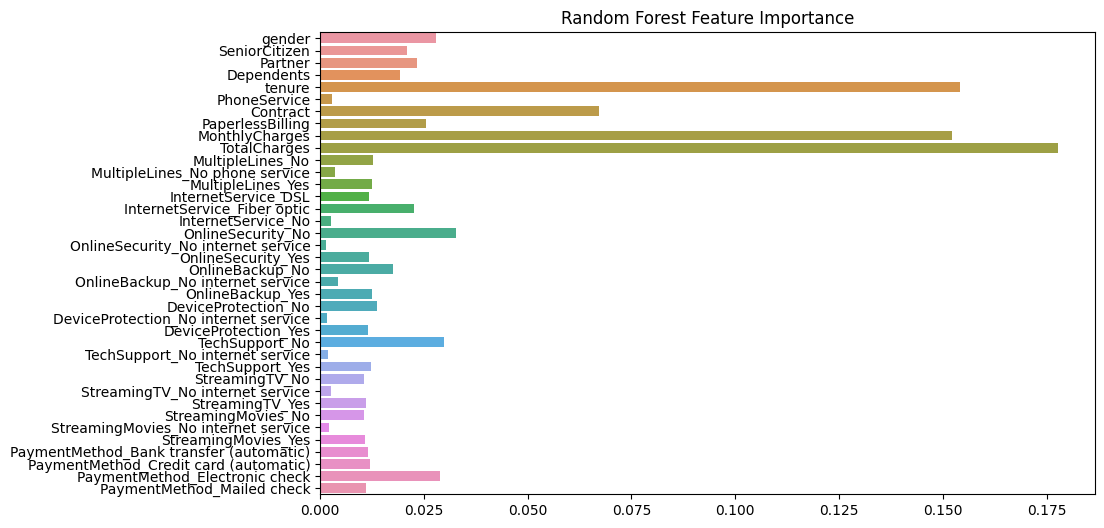

In [286]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_rf, y=df.drop(['Churn'], axis=1).columns)
plt.title('Random Forest Feature Importance')
plt.show()

In [287]:
# Set the threshold for feature importance
threshold = 0.02

# Get the indices of features with importance scores above the threshold
important_feature_indices = np.where(feature_importance_rf > threshold)[0]

# Get the corresponding column names
important_feature_names = df.drop(['Churn'], axis=1).columns[important_feature_indices]

# Display the important features and their importance scores
for name, importance in zip(important_feature_names, feature_importance_rf[important_feature_indices]):
    print(f"{name}: {importance}")

gender: 0.02792115702690568
SeniorCitizen: 0.02090786826041152
Partner: 0.023259814583447648
tenure: 0.15411640070753677
Contract: 0.06709225429013241
PaperlessBilling: 0.025471308530436054
MonthlyCharges: 0.15222238904718927
TotalCharges: 0.17773492359411264
InternetService_Fiber optic: 0.022721824377086433
OnlineSecurity_No: 0.03265280684660261
TechSupport_No: 0.029802016254788753
PaymentMethod_Electronic check: 0.02884926999845676


In [288]:
##EDA for some of the impotant features (selected independent variables) to find out which customer profiles relate to churning a lot

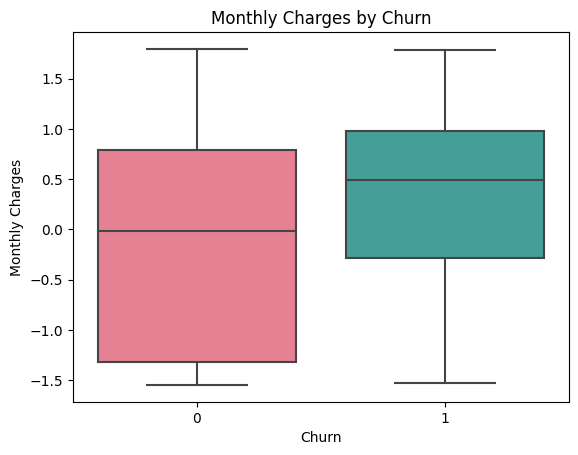

In [289]:
# Define a function for creating a boxplot
def plot_box(x, y, data, xlabel, ylabel, title):
    sns.boxplot(x=x, y=y, data=data, palette='husl')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Box plot for Monthly Charges by Churn
plot_box("Churn", "MonthlyCharges", df, "Churn", "Monthly Charges", "Monthly Charges by Churn")

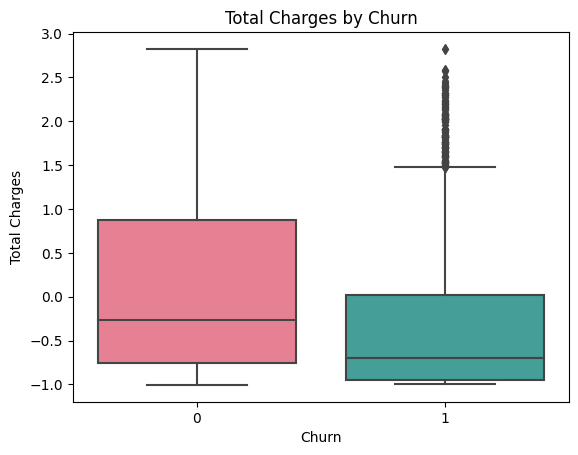

In [290]:
# Box plot for Total Charges by Churn
plot_box("Churn", "TotalCharges", df, "Churn", "Total Charges", "Total Charges by Churn")

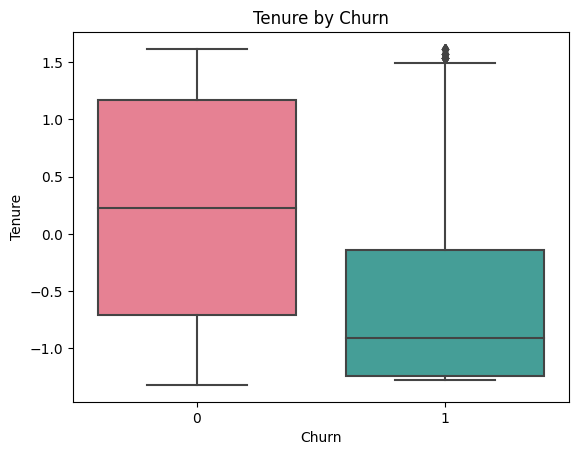

In [291]:
# Box plot for Tenure by Churn
plot_box("Churn", "tenure", df, "Churn", "Tenure", "Tenure by Churn")

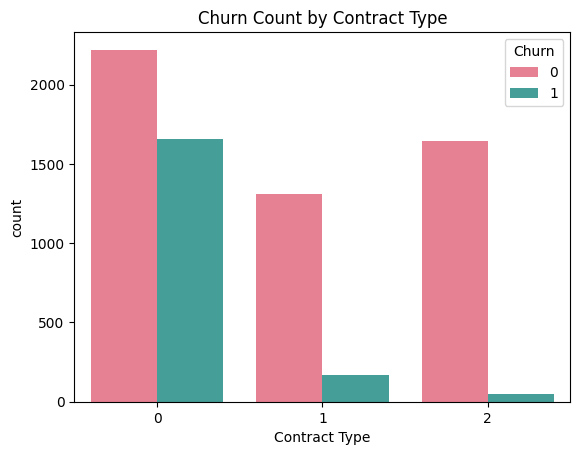

In [292]:
# Define a function for creating a count plot
def plot_count(x, hue, data, xlabel, title):
    sns.countplot(x=x, hue=hue, data=data, palette='husl')
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

# Count plot for Contract type by Churn
plot_count("Contract", "Churn", df, "Contract Type", "Churn Count by Contract Type")

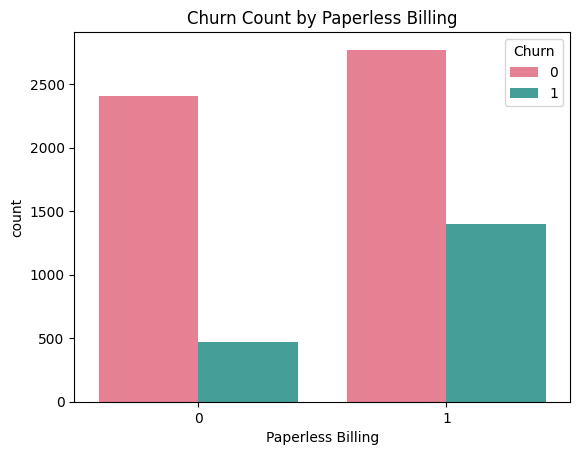

In [293]:
# Count plot for PaperlessBilling by Churn
plot_count("PaperlessBilling", "Churn", df, "Paperless Billing", "Churn Count by Paperless Billing")

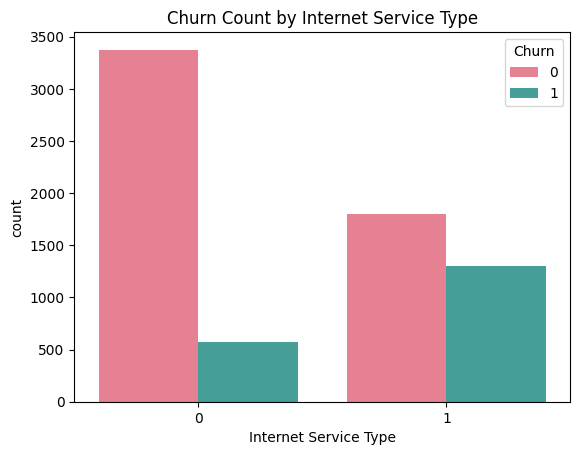

In [294]:
# Count plot for Internet Service type by Churn
plot_count("InternetService_Fiber optic", "Churn", df, "Internet Service Type", "Churn Count by Internet Service Type")

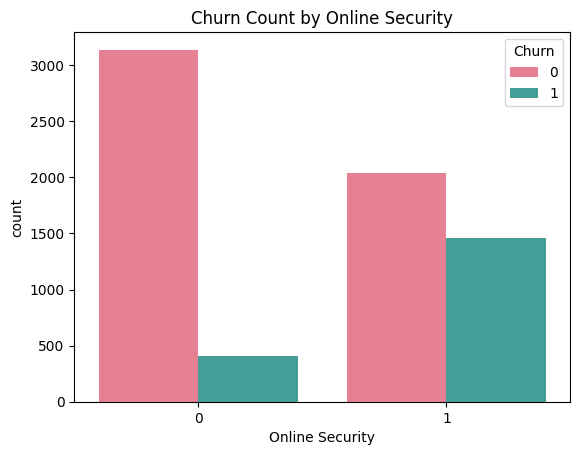

In [295]:
# Count plot for Online Security by Churn
plot_count("OnlineSecurity_No", "Churn", df, "Online Security", "Churn Count by Online Security")

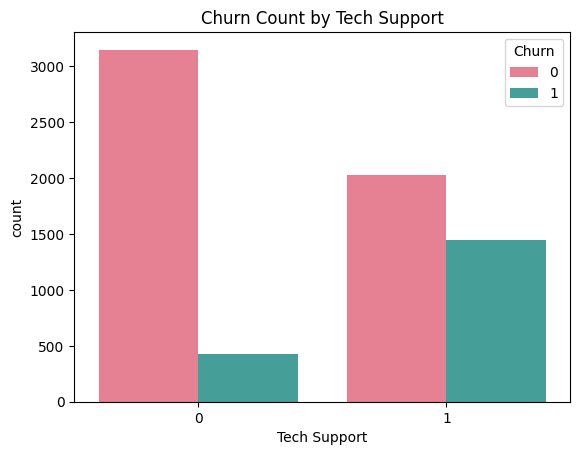

In [296]:
# Count plot for Tech Support by Churn
plot_count("TechSupport_No", "Churn", df, "Tech Support", "Churn Count by Tech Support")

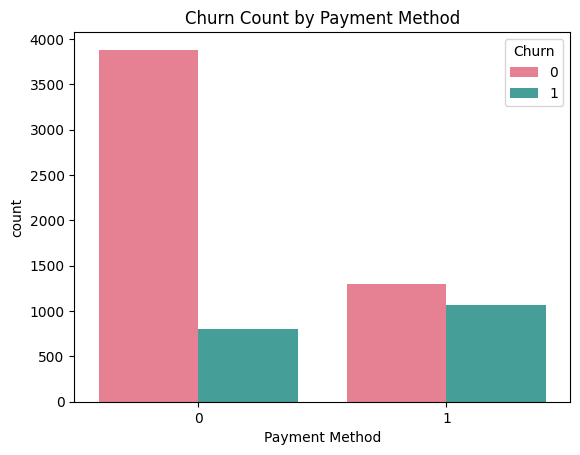

In [297]:
# Count plot for Payment Method by Churn
plot_count("PaymentMethod_Electronic check", "Churn", df, "Payment Method", "Churn Count by Payment Method")

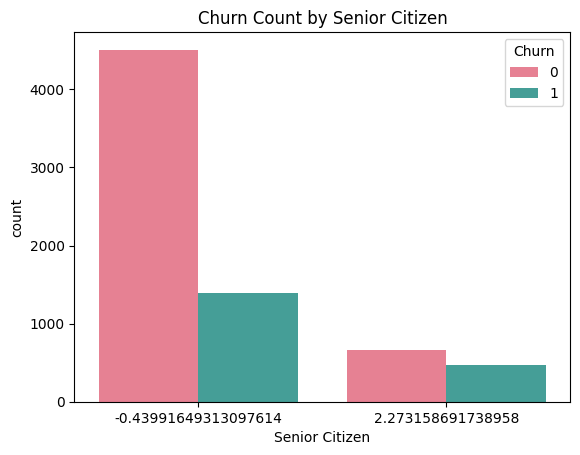

In [298]:
# Count plot for Senior Citizen by Churn
plot_count("SeniorCitizen", "Churn", df, "Senior Citizen", "Churn Count by Senior Citizen")

**MODEL TRAINING**

In [299]:
#After feature importance, we realized our columns needed and placed all of them in an array
selected_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'tenure', 'Contract', 'PaperlessBilling',
    'MonthlyCharges', 'TotalCharges', 'InternetService_Fiber optic',
    'OnlineSecurity_No', 'TechSupport_No', 'PaymentMethod_Electronic check'
]


X= df[selected_columns].values
y= df['Churn'].values

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   float64
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   float64
 5   PhoneService                             7043 non-null   int64  
 6   Contract                                 7043 non-null   int64  
 7   PaperlessBilling                         7043 non-null   int64  
 8   MonthlyCharges                           7043 non-null   float64
 9   TotalCharges                             7043 non-null   float64
 10  Churn                                    7043 no

**TRAINING, TESTING & CROSSVALIDATION WITH GRIDSEARCHCV**

In [301]:
# Split your data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [302]:
# Define input layer
inputs = keras.Input(shape=(12,))

# Build the model using Functional API with dropout
x = keras.layers.Dense(units=20, activation='relu')(inputs)
x = keras.layers.Dense(units=20, activation='relu')(x)
x = keras.layers.Dense(units=20, activation='relu')(x)
outputs = keras.layers.Dense(units=1, activation='sigmoid')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using the resampled training data
history = model.fit(X_train, y_train, batch_size=32, epochs=25, validation_data=(X_val, y_val))


Epoch 1/25
177/177 [==============================] - 2s 5ms/step - loss: 0.4832 - accuracy: 0.7488 - val_loss: 0.4028 - val_accuracy: 0.8142
Epoch 2/25
177/177 [==============================] - 1s 3ms/step - loss: 0.4424 - accuracy: 0.7852 - val_loss: 0.3937 - val_accuracy: 0.8241
Epoch 3/25
177/177 [==============================] - 1s 4ms/step - loss: 0.4342 - accuracy: 0.7877 - val_loss: 0.3836 - val_accuracy: 0.8270
Epoch 4/25
177/177 [==============================] - 1s 4ms/step - loss: 0.4297 - accuracy: 0.7927 - val_loss: 0.3821 - val_accuracy: 0.8213
Epoch 5/25
177/177 [==============================] - 1s 3ms/step - loss: 0.4264 - accuracy: 0.7962 - val_loss: 0.3843 - val_accuracy: 0.8298
Epoch 6/25
177/177 [==============================] - 1s 4ms/step - loss: 0.4244 - accuracy: 0.7968 - val_loss: 0.3840 - val_accuracy: 0.8213
Epoch 7/25
177/177 [==============================] - 0s 3ms/step - loss: 0.4223 - accuracy: 0.8021 - val_loss: 0.3789 - val_accuracy: 0.8270
Epoch 

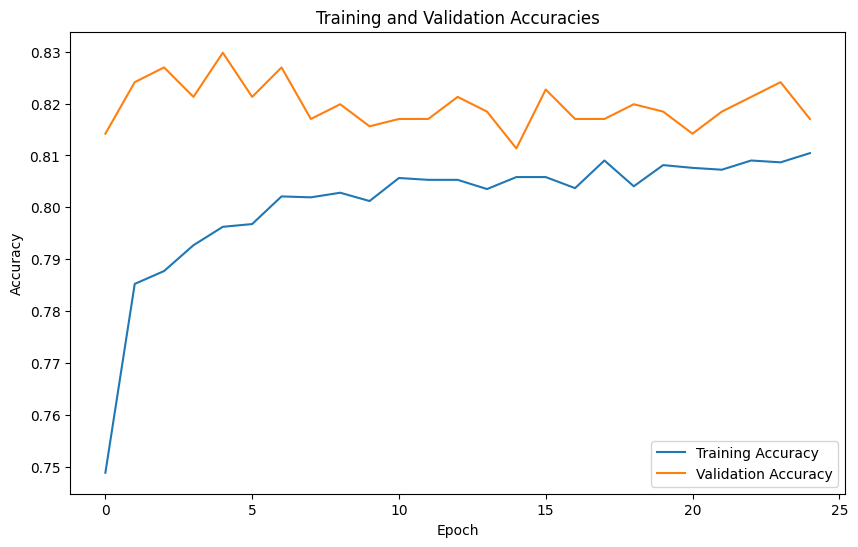

Test accuracy: 0.8110795617103577


In [303]:
# Plot the training and validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Test accuracy: {test_accuracy}")

In [304]:
print(f"Training accuracy: {history.history['accuracy'][-1]}")
print(f"Validation accuracy: {history.history['val_accuracy'][-1]}")

Training accuracy: 0.8104366064071655
Validation accuracy: 0.8170212507247925


In [305]:
#Testing the model
predictions = model.predict(X_test)

22/22 [==============================] - 0s 2ms/step


In [306]:
#Double-check if the true values and the predicted values have any null values
nan_in_y_train = pd.isna(y_train)
nan_in_predictions = pd.isna(predictions)

print("NaN values in y_train:", nan_in_y_train.any())
print("NaN values in predictions:", nan_in_predictions.any())

NaN values in y_train: False
NaN values in predictions: False


In [307]:
#Evaluated the model’s accuracy, calculate the AUC score
auc_score = roc_auc_score(y_test, predictions)
auc_score

0.8435337560380227

**OPTIMIZATION (HYPER PARAMETER TUNING)**

In [308]:
param_grid = {
    'batch_size': [24, 32],
    'epochs': [25, 50],
    'units': [10, 20, 30],
    'activation': ['selu','relu'],
    'optimizer': ['adam'],
}


best_accuracy = 0
best_hyperparameters = None

training_accuracies = []
validation_accuracies = []

In [309]:
for units in param_grid['units']:
    for activation in param_grid['activation']:
        for optimizer in param_grid['optimizer']:
            for batch_size in param_grid['batch_size']:
                for epochs in param_grid['epochs']:
                    # Define input layer
                    inputs = Input(shape=(12,))

                    # Build the model using Functional API
                    x = Dense(units=units, activation=activation)(inputs)
                    x = Dense(units=units, activation=activation)(x)
                    x = Dense(units=units, activation=activation)(x)
                    outputs = Dense(units=1, activation='sigmoid')(x)

                    model = keras.Model(inputs=inputs, outputs=outputs)

                    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

                    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

                    # Append accuracies to the lists
                    training_accuracies.append(history.history['accuracy'][-1])
                    validation_accuracies.append(history.history['val_accuracy'][-1])

                    if history.history['val_accuracy'][-1] > best_accuracy:
                        best_hyperparameters = (units, activation, optimizer, batch_size, epochs)
                        best_accuracy = history.history['val_accuracy'][-1]
                        best_model1 = model

Epoch 1/25
235/235 [==============================] - 2s 5ms/step - loss: 0.4618 - accuracy: 0.7689 - val_loss: 0.4061 - val_accuracy: 0.8000
Epoch 2/25
235/235 [==============================] - 1s 4ms/step - loss: 0.4341 - accuracy: 0.7898 - val_loss: 0.3914 - val_accuracy: 0.8099
Epoch 3/25
235/235 [==============================] - 1s 5ms/step - loss: 0.4293 - accuracy: 0.7961 - val_loss: 0.3890 - val_accuracy: 0.8241
Epoch 4/25
235/235 [==============================] - 1s 4ms/step - loss: 0.4267 - accuracy: 0.7973 - val_loss: 0.3877 - val_accuracy: 0.8199
Epoch 5/25
235/235 [==============================] - 1s 4ms/step - loss: 0.4251 - accuracy: 0.7975 - val_loss: 0.3872 - val_accuracy: 0.8170
Epoch 6/25
235/235 [==============================] - 1s 3ms/step - loss: 0.4251 - accuracy: 0.7968 - val_loss: 0.3840 - val_accuracy: 0.8170
Epoch 7/25
235/235 [==============================] - 1s 3ms/step - loss: 0.4245 - accuracy: 0.8010 - val_loss: 0.3873 - val_accuracy: 0.8199
Epoch 

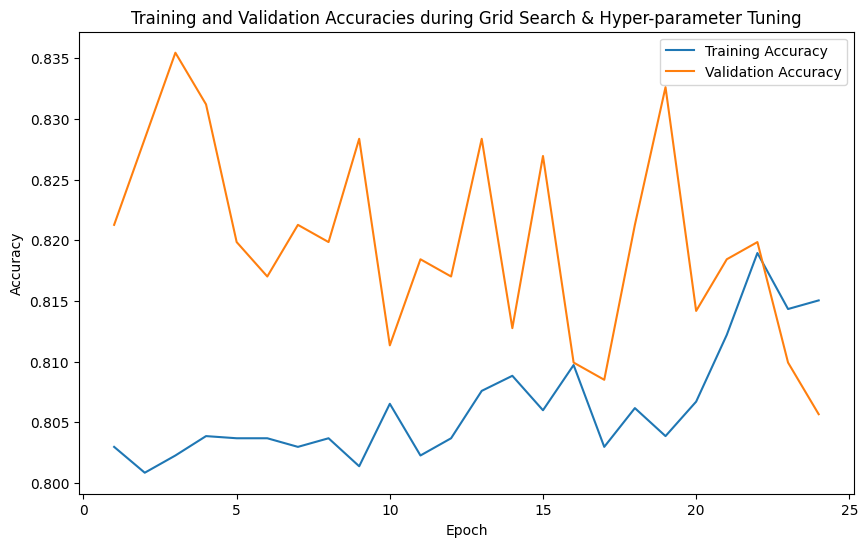

Test accuracy using the best model: 0.7982954382896423


In [310]:
# Plot the best training and validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(training_accuracies) + 1), training_accuracies, label='Training Accuracy')
plt.plot(range(1, len(validation_accuracies) + 1), validation_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies during Grid Search & Hyper-parameter Tuning')
plt.legend()
plt.show()


# Evaluate the best model on the test set
test_accuracy = best_model1.evaluate(X_test, y_test, verbose=0)[1]
print(f"Test accuracy using the best model: {test_accuracy}")

In [311]:
print(f"Best training accuracy: {history.history['accuracy'][-1]}")
print(f"Best validation accuracy: {history.history['val_accuracy'][-1]}")
print(f"Best hyperparameters: {best_hyperparameters}")


Best training accuracy: 0.8150514960289001
Best validation accuracy: 0.8056737780570984
Best hyperparameters: (10, 'selu', 'adam', 32, 25)


In [312]:
#Test the new model
predictions = best_model1.predict(X_test)

22/22 [==============================] - 0s 2ms/step


In [313]:
#Evaluated the new retrained model’s accuracy, calculate the AUC score
auc_score2 = roc_auc_score(y_test, predictions)
auc_score2

0.8465540603440251

In [314]:
best_model1.save("best_model1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
